<a href="https://colab.research.google.com/github/godwins3/ml-playground/blob/main/projects/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
files = get_image_files(path/"images")
len(files)

7390

In [ ]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_195.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_94.jpg'))

In [ ]:
def label_func(f): return f[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

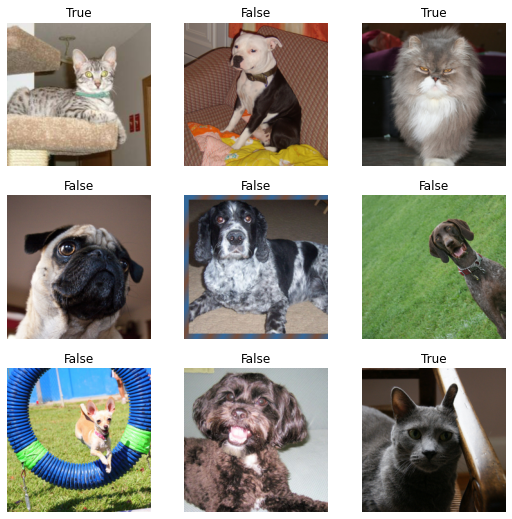

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.132373,0.020333,0.004060,28:16


epoch,train_loss,valid_loss,error_rate,time
0,0.055131,0.010142,0.003383,41:24


In [ ]:
learn.predict(files[0])

('False', TensorBase(0), TensorBase([1.0000e+00, 1.0084e-07]))

In [ ]:
learn.show_results()

In [ ]:
files[0].name

In [ ]:
pat = r'^(.*)_\d+.jpg'

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

In [ ]:
dls.show_batch()

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))